<a href="https://colab.research.google.com/github/gary464/Physics-Files/blob/main/Basic_Kinematics_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **This COLAB Notebook is an introduction to Python Programming to represent basic Kinematics**

**Let's Import some needed libraries**

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation

**Now we will add a simple ball moving across a 2-D surface at constant velocity.**

First, we will create and initialize variables for the x and y locations, the x and y velocities and time.

In [3]:
x = 0
y = 0
vx = 2
vy = 1.1
t = 0

**Now we will use a WHILE LOOP Structure to generate our x and y location data as time progresses.**

We will first create new varibales which will be arrays (a set of data points).  We will use the following format for these variables: saved_x to represent our saved array of x locations.

The while loop will take the initial value of t (set to 0) and run the included functions to determine the location of x and y for that t value.  It will then "append" the x and y locations at that t to the new saved array.  At the end, time t will de increased by the set interval (in this case 1) by the equation t = t+1.

**NOTE:** all of the code inside the while loop is indented at the same level.  When you are completed with the loop, you start coding back at the un-indented level, this signifies the loop is complete.

The While loop includes the standard form of the function for the location of an object travelling at constant velocity: Position = initial position + (velocity * change in time)

x = x0 + vx * t

The print(saved_x) command just prints the new array so you may inspect it.

Try running the code again, but first comment out the t = 1 before the while loop and observe the change in output for saved_x.

In [4]:
# Create the arrays to store the x and y locations from our functions
saved_x = [x]
saved_y = [y]
saved_t = [t]

t = 1  # Here we reset t = 1, the arrays saved_x etc already have the data point when t = 0

# This while will run over and over until t is greater than 10 (from 0 - 10: 11 steps).
while t <= 10:
  saved_x.append(x + vx*t)
  saved_y.append(y + vy*t)
  saved_t.append(t)

  t = t + 1
print(saved_x)
print(saved_y)
print(saved_t)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
[0, 1.1, 2.2, 3.3000000000000003, 4.4, 5.5, 6.6000000000000005, 7.700000000000001, 8.8, 9.9, 11.0]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


**It is now time to plot the data to visualize the results**

First, let's plot just a representation of x vs. time.  We will plot our data using a scatter plot.  The coding for the scatter plot comes from the library matplot.lib.pyplot which we loaded in our initial steps.

Notice How easy it is to add titles and axis labels to plots in Python.

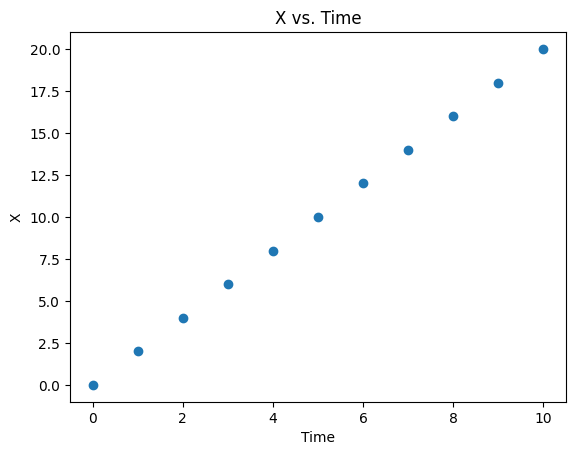

In [7]:
scatter_plot = plt.scatter(saved_t, saved_x)
plt.title('X vs. Time')
plt.xlabel('Time')
plt.ylabel('X')
plt.show()